In [1]:
# Install semua modul
!pip install numpy pandas matplotlib seaborn scikit-learn tensorflow statsmodels

# Manipulasi data
import pandas as pd
import numpy as np

# Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Pre-processing
from sklearn.preprocessing import MinMaxScaler

# Statistik untuk ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

# Evaluasi
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Model LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam



[notice] A new release of pip is available: 23.1.2 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Download langsung data XRP
!pip install yfinance
import yfinance as yf
data = yf.download('XRP-USD', start='2020-01-01', end='2024-12-31')

# Lihat struktur data
print(data.head())


                                              0.0/113.7 kB ? eta -:--:--
     --------------                          41.0/113.7 kB 1.9 MB/s eta 0:00:01
     -------------------------------------- 113.7/113.7 kB 1.6 MB/s eta 0:00:00
  Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
                                              0.0/3.0 MB ? eta -:--:--
     ----                                     0.4/3.0 MB 7.4 MB/s eta 0:00:01
     --------                                 0.6/3.0 MB 6.6 MB/s eta 0:00:01
     ----------------                         1.3/3.0 MB 8.9 MB/s eta 0:00:01
     ---------------------                    1.6/3.0 MB 8.6 MB/s eta 0:00:01
     ----------------------------             2.2/3.0 MB 9.1 MB/s eta 0:00:01
     -----------------------------------      2.7/3.0 MB 9.6 MB/s eta 0:00:01
     ---------------------------------------- 3.0/3.0 MB 9.2 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with s


[notice] A new release of pip is available: 23.1.2 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price          Close      High       Low      Open      Volume
Ticker       XRP-USD   XRP-USD   XRP-USD   XRP-USD     XRP-USD
Date                                                          
2020-01-01  0.192667  0.194362  0.192107  0.192912  1041134003
2020-01-02  0.188043  0.192896  0.186947  0.192708  1085351426
2020-01-03  0.193521  0.194070  0.185846  0.187948  1270017043
2020-01-04  0.194355  0.194653  0.191835  0.193521   999331594
2020-01-05  0.195537  0.199223  0.193884  0.194367  1168067557


In [11]:
# Hapus data duplikat
data = data.drop_duplicates()

# Cek missing value
print(data.isnull().sum())

# Isi missing value jika ada
data = data.fillna(method='ffill')


Price   Ticker 
Close   XRP-USD    0
High    XRP-USD    0
Low     XRP-USD    0
Open    XRP-USD    0
Volume  XRP-USD    0
dtype: int64


C:\Users\Arsa\AppData\Local\Temp\ipykernel_31020\163648395.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


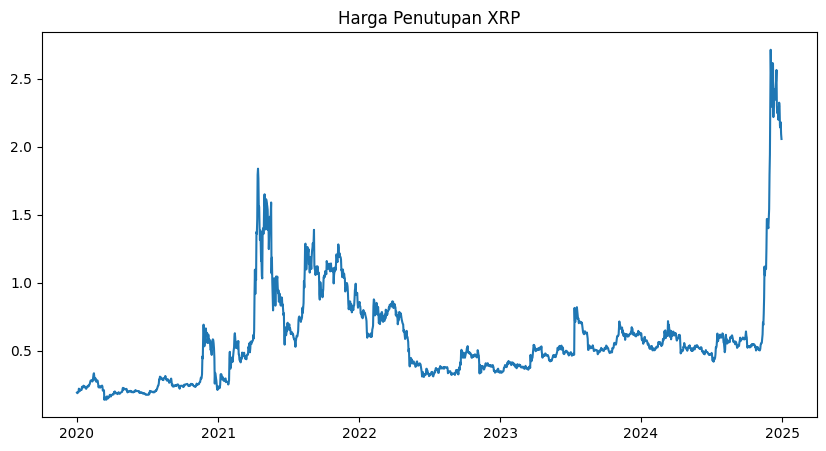

In [12]:
close_price = data['Close']
plt.figure(figsize=(10,5))
plt.plot(close_price)
plt.title('Harga Penutupan XRP')
plt.show()


In [17]:
result = adfuller(close_price)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
# Karena p-value < 0.05 -> data sudah stasioner

ADF Statistic: -3.0051898227589238
p-value: 0.034412570378955634


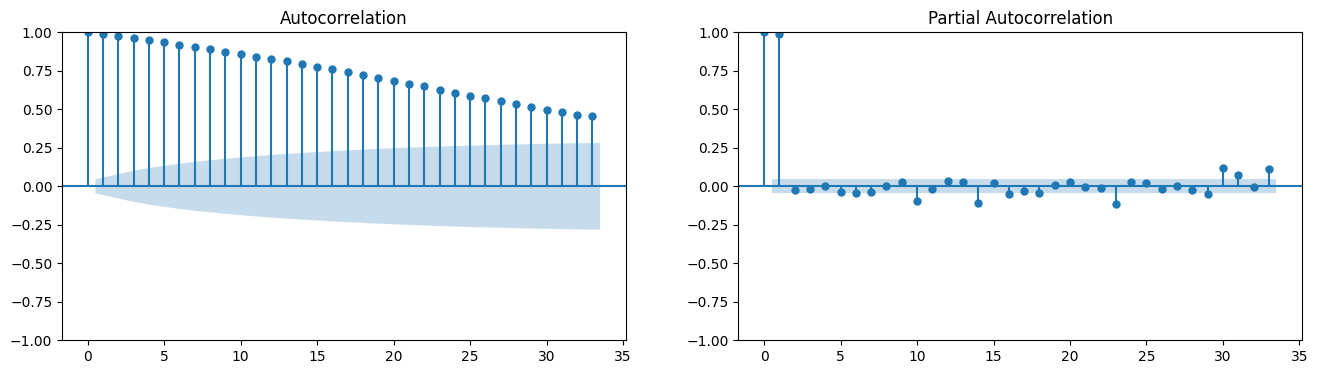

In [18]:
fig, axes = plt.subplots(1,2, figsize=(16,4))
plot_acf(close_price, ax=axes[0])
plot_pacf(close_price, ax=axes[1])
plt.show()


In [19]:
train_size = int(len(close_price) * 0.8)
train_arima, test_arima = close_price[:train_size], close_price[train_size:]

In [20]:
model_arima = ARIMA(train_arima, order=(1,1,1))
model_arima_fit = model_arima.fit()
print(model_arima_fit.summary())


d:\Arsa_Project\Forecasting-dan-Analisis-Tren-Aset-XRP-Menggunakan-Model-ARIMA-dan-LSTM\lib\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\Arsa_Project\Forecasting-dan-Analisis-Tren-Aset-XRP-Menggunakan-Model-ARIMA-dan-LSTM\lib\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\Arsa_Project\Forecasting-dan-Analisis-Tren-Aset-XRP-Menggunakan-Model-ARIMA-dan-LSTM\lib\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                XRP-USD   No. Observations:                 1460
Model:                 ARIMA(1, 1, 1)   Log Likelihood                2559.802
Date:                Mon, 28 Apr 2025   AIC                          -5113.604
Time:                        22:19:27   BIC                          -5097.747
Sample:                    01-01-2020   HQIC                         -5107.688
                         - 12-30-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1053      0.149     -0.704      0.481      -0.398       0.188
ma.L1          0.0328      0.150      0.219      0.827      -0.261       0.327
sigma2         0.0018   1.58e-05    110.972      0.0

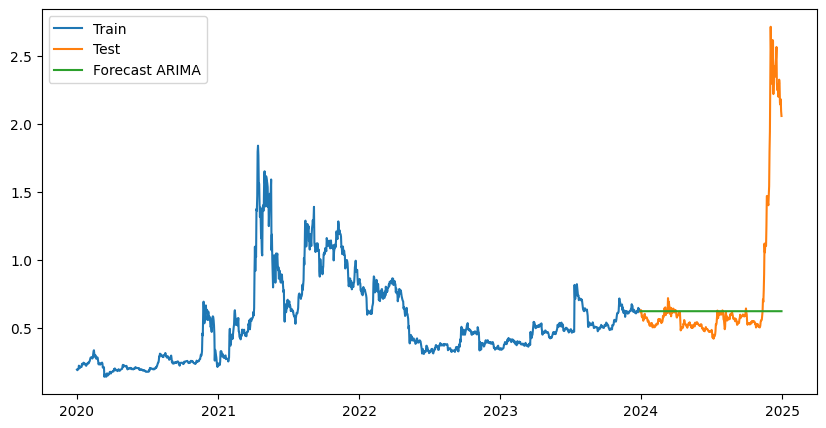

ARIMA MSE: 0.2776870216551773
ARIMA MAE: 0.2381427145679889


In [21]:
forecast_arima = model_arima_fit.forecast(steps=len(test_arima))
forecast_arima = pd.Series(forecast_arima, index=test_arima.index)

plt.figure(figsize=(10,5))
plt.plot(train_arima, label='Train')
plt.plot(test_arima, label='Test')
plt.plot(forecast_arima, label='Forecast ARIMA')
plt.legend()
plt.show()

# Evaluasi
mse_arima = mean_squared_error(test_arima, forecast_arima)
mae_arima = mean_absolute_error(test_arima, forecast_arima)
print('ARIMA MSE:', mse_arima)
print('ARIMA MAE:', mae_arima)


In [22]:
scaler = MinMaxScaler()
scaled_close = scaler.fit_transform(close_price.values.reshape(-1,1))


In [23]:
# Membuat window sequence
def create_sequences(data, window_size):
    X = []
    y = []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

window_size = 60
X, y = create_sequences(scaled_close, window_size)

# Split train-test
X_train, X_test = X[:train_size-window_size], X[train_size-window_size:]
y_train, y_test = y[:train_size-window_size], y[train_size-window_size:]

# Reshape input untuk LSTM [samples, time_steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [24]:
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_lstm.add(LSTM(units=50))
model_lstm.add(Dense(1))

model_lstm.compile(optimizer=Adam(), loss='mean_squared_error')


d:\Arsa_Project\Forecasting-dan-Analisis-Tren-Aset-XRP-Menggunakan-Model-ARIMA-dan-LSTM\lib\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
history = model_lstm.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)


Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 78ms/step - loss: 0.0074 - val_loss: 2.3668e-04
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0016 - val_loss: 1.8910e-04
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0014 - val_loss: 1.7618e-04
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0012 - val_loss: 2.9368e-04
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0011 - val_loss: 1.2480e-04
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0011 - val_loss: 3.0154e-04
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 9.3632e-04 - val_loss: 2.2037e-04
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 8.2165e-04 - val_loss: 1.0384e-04
Epoch 9/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 7.6413e-04 - val_loss: 1.8520e-04
Epoch 10/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 8.0800e-04 - val_loss: 1.1169e-04
Epoch 11/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 7.2236e-04 - val_loss: 1.1241e-04

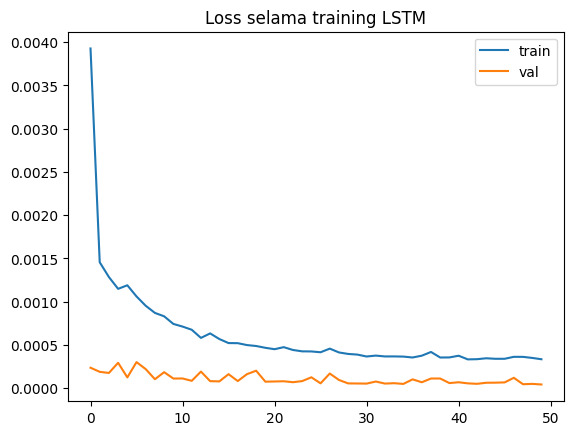

In [26]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.title('Loss selama training LSTM')
plt.show()


In [27]:
predictions_lstm = model_lstm.predict(X_test)
predictions_lstm = scaler.inverse_transform(predictions_lstm)
y_test_original = scaler.inverse_transform(y_test.reshape(-1,1))


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step


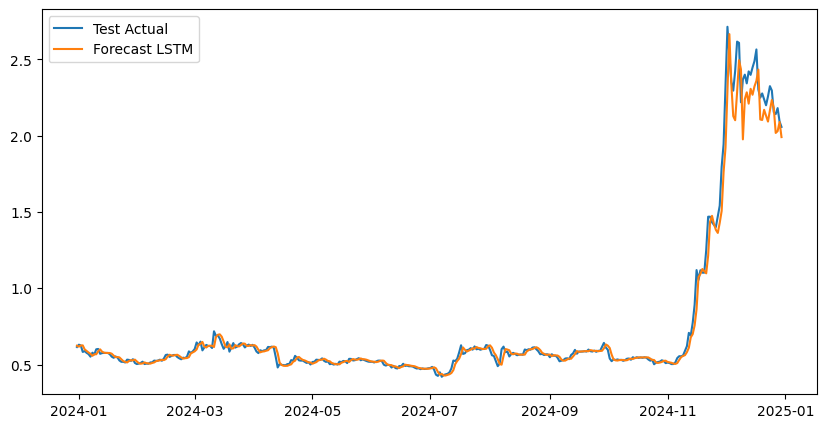

LSTM MSE: 0.0044858057330163705
LSTM MAE: 0.029990184665377673


In [28]:
test_dates = close_price.index[train_size:]

plt.figure(figsize=(10,5))
plt.plot(test_dates, y_test_original, label='Test Actual')
plt.plot(test_dates, predictions_lstm, label='Forecast LSTM')
plt.legend()
plt.show()

# Evaluasi
mse_lstm = mean_squared_error(y_test_original, predictions_lstm)
mae_lstm = mean_absolute_error(y_test_original, predictions_lstm)
print('LSTM MSE:', mse_lstm)
print('LSTM MAE:', mae_lstm)


In [29]:
print(f'ARIMA MSE: {mse_arima:.4f} - LSTM MSE: {mse_lstm:.4f}')
print(f'ARIMA MAE: {mae_arima:.4f} - LSTM MAE: {mae_lstm:.4f}')


ARIMA MSE: 0.2777 - LSTM MSE: 0.0045
ARIMA MAE: 0.2381 - LSTM MAE: 0.0300
